In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

train_df = pd.read_csv('./Datasets/train.csv')
test_df = pd.read_csv('./Datasets/test.csv')

print("Columns in train_df:", train_df.columns)
print("Columns in test_df:", test_df.columns)

def prepare_data(train_df, test_df, target_column='price_range'):
    if target_column not in train_df.columns:
        raise KeyError(f"'{target_column}' column not found in train_df.")

    X_train = train_df.drop(target_column, axis=1)
    y_train = train_df[target_column]

    X_test = test_df.drop('id', axis=1)  # Remove 'id' column from test_df
    X_test = X_test[X_train.columns]      # Ensure same feature columns as X_train

    return X_train, y_train, X_test

try:
    X_train, y_train, X_test = prepare_data(train_df, test_df, target_column='price_range')
except KeyError as e:
    print(e)
    exit()

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train_scaled, y_train, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split)

y_val_pred = model.predict(X_val_split)
val_accuracy = accuracy_score(y_val_split, y_val_pred)
print(f"Validation accuracy: {val_accuracy:.2f}")

y_test_pred = model.predict(X_test_scaled)

predictions_df = pd.DataFrame({
    'id': test_df['id'],
    'predicted_price_range': y_test_pred
})
predictions_df.to_csv('predictions.csv', index=False)

print("Predictions saved to 'predictions.csv'")

Columns in ./Datasets/Almond.csv: ['Unnamed: 0', 'Length (major axis)', 'Width (minor axis)', 'Thickness (depth)', 'Area', 'Perimeter', 'Roundness', 'Solidity', 'Compactness', 'Aspect Ratio', 'Eccentricity', 'Extent', 'Convex hull(convex area)', 'Type']
Columns in ./Datasets/weather_classification_data.csv: ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season', 'Visibility (km)', 'Location', 'Weather Type']
Columns in ./Datasets/plant_growth_data.csv: ['Soil_Type', 'Sunlight_Hours', 'Water_Frequency', 'Fertilizer_Type', 'Temperature', 'Humidity', 'Growth_Milestone']


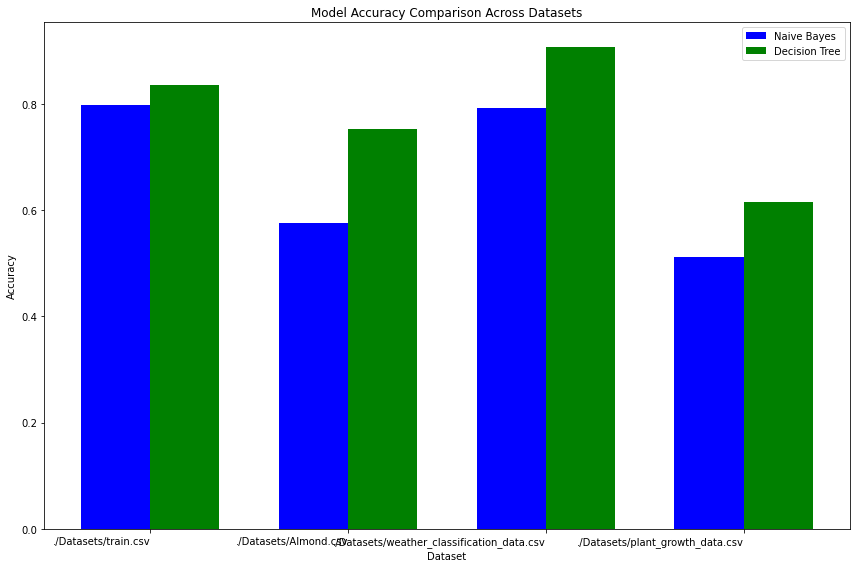

train.csv
Almond.csv
weather_classification_data.csv
plant_growth_data.csv


In [4]:
datasets = ['./Datasets/Almond.csv', './Datasets/weather_classification_data.csv', './Datasets/plant_growth_data.csv']

for dataset in datasets:
    df = pd.read_csv(dataset)
    print(f"Columns in {dataset}: {df.columns.tolist()}")

    def prepare_data(dataset_path, target_column):
    df = pd.read_csv(dataset_path)

    if 'Unnamed: 0' in df.columns:
        df = df.drop('Unnamed: 0', axis=1)

    if target_column not in df.columns:
        raise KeyError(f"'{target_column}' column not found in the dataset.")

    X = df.drop(target_column, axis=1)
    y = df[target_column]

    return X, y

def train_and_evaluate(X, y):
    X = pd.get_dummies(X)

    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)

    X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
        X_imputed, y, test_size=0.2, random_state=42
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_split)
    X_val_scaled = scaler.transform(X_val_split)

    nb_model = GaussianNB()
    nb_model.fit(X_train_scaled, y_train_split)

    y_val_pred_nb = nb_model.predict(X_val_scaled)
    val_accuracy_nb = accuracy_score(y_val_split, y_val_pred_nb)

    dt_model = DecisionTreeClassifier(random_state=42)
    dt_model.fit(X_train_scaled, y_train_split)

    y_val_pred_dt = dt_model.predict(X_val_scaled)
    val_accuracy_dt = accuracy_score(y_val_split, y_val_pred_dt)

    return val_accuracy_nb, val_accuracy_dt

datasets = [
    {'path': './Datasets/train.csv', 'target_column': 'price_range'},
    {'path': './Datasets/Almond.csv', 'target_column': 'Type'},
    {'path': './Datasets/weather_classification_data.csv', 'target_column': 'Weather Type'},
    {'path': './Datasets/plant_growth_data.csv', 'target_column': 'Growth_Milestone'}
]

results = {'Dataset': [], 'Naive Bayes Accuracy': [], 'Decision Tree Accuracy': []}

for dataset in datasets:
    try:
        X, y = prepare_data(dataset['path'], dataset['target_column'])
        val_accuracy_nb, val_accuracy_dt = train_and_evaluate(X, y)

        results['Dataset'].append(dataset['path'])
        results['Naive Bayes Accuracy'].append(val_accuracy_nb)
        results['Decision Tree Accuracy'].append(val_accuracy_dt)

    except KeyError as e:
        print(f"Error processing dataset {dataset['path']}: {e}")

results_df = pd.DataFrame(results)

fig, ax = plt.subplots(figsize=(12, 8))

bar_width = 0.35
index = range(len(results_df['Dataset']))
bar1 = ax.bar(index, results_df['Naive Bayes Accuracy'], bar_width, label='Naive Bayes', color='blue')
bar2 = ax.bar([i + bar_width for i in index], results_df['Decision Tree Accuracy'], bar_width, label='Decision Tree', color='green')

ax.set_xlabel('Dataset')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy Comparison Across Datasets')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(results_df['Dataset'], rotation=0, ha='right')
ax.legend()

plt.tight_layout()
plt.show()